<a href="https://colab.research.google.com/github/highonhues/cs131/blob/main/a4/a4_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tasks  
In this assignment, you will analyze the Wine Quality dataset (https://archive.ics.uci.edu/dataset/186/wine+qualityLinks to an external site.). Complete the following tasks ONLY FOR "WHITE" WINE data points.

1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)

2. Illustrate the correlation matrix of all features and the target.

3. Plot a histogram of the target value (quality).

4. Illustrate the violin plots of all features. Make sure that each plot is visible.

5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2

In [3]:
!pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

 0. Only white wine datapoints

In [5]:
df =pd.read_csv("https://archive.ics.uci.edu/static/public/186/data.csv")
wine = df[df.color == "white"].copy()
wine.drop(columns=["color"],inplace=True)
wine.reset_index(drop=True, inplace = True)
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7



1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)


In [6]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000



2. Illustrate the correlation matrix of all features and the target.


In [46]:
X = wine.drop(columns=['quality']).copy()
y= wine.quality

cm = wine.corr()
cm

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


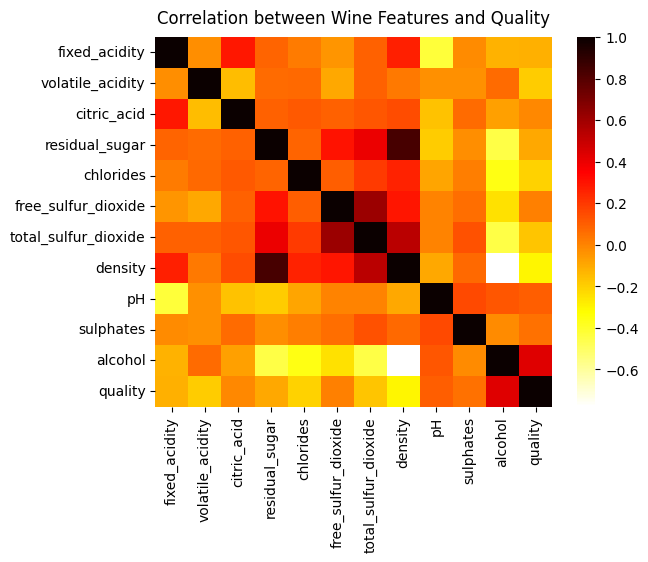

In [51]:
sns.heatmap(cm, cmap="hot_r").set_title("Correlation between Wine Features and Quality", pad = 10
                                        );


3. Plot a histogram of the target value (quality).


In [74]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9])

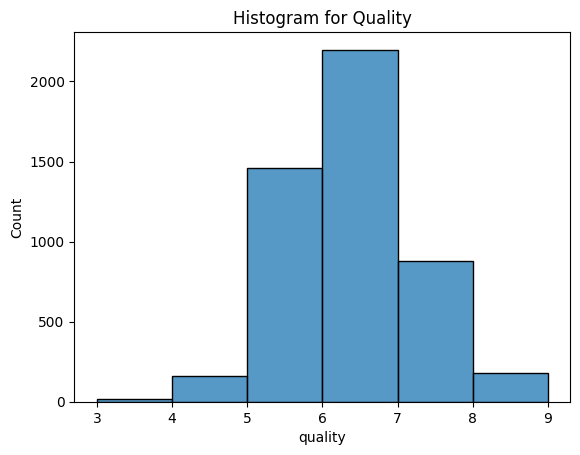

In [71]:
sns.histplot(y,binwidth=1).set_title(f'Histogram for Quality');


4. Illustrate the violin plots of all features. Make sure that each plot is visible.


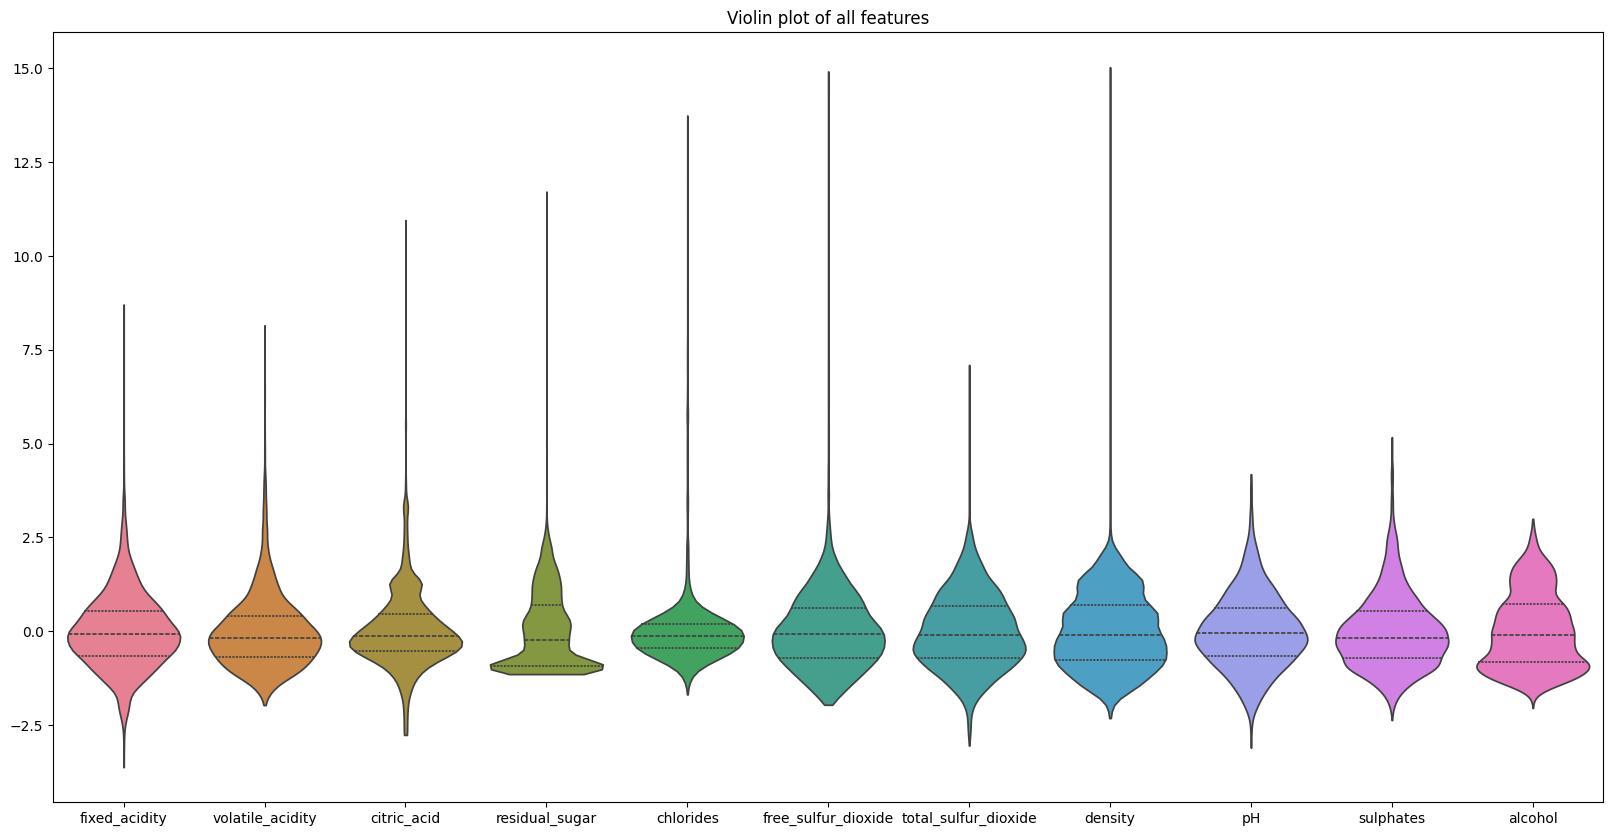

In [20]:
scaler = StandardScaler()

scaled_wine = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # X has no target
plt.figure(figsize=(20, 10))

sns.violinplot(data=scaled_wine, inner="quart", density_norm="width", cut=0)
plt.title(f'Violin plot of all features');


5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.


In [37]:
# #splitting into test and train before fitting and predict
# X_train, X_test, y_train, y_test = train_test_split(X[['alcohol']], y, random_state=42)
lr = LinearRegression().fit(X[['alcohol']], y)
y_pred = lr.predict(X[["alcohol"]])
r2_1= r2_score(y, y_pred)
RMSE1 = np.sqrt(mean_squared_error(y, y_pred))

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print(f"r2_score: {r2_1}")
print(f"RMSE: {RMSE1}")


lr.coef_: [0.3134693]
lr.intercept_: 2.582009399160653
r2_score: 0.18972533274950443
RMSE: 0.7971284628752668


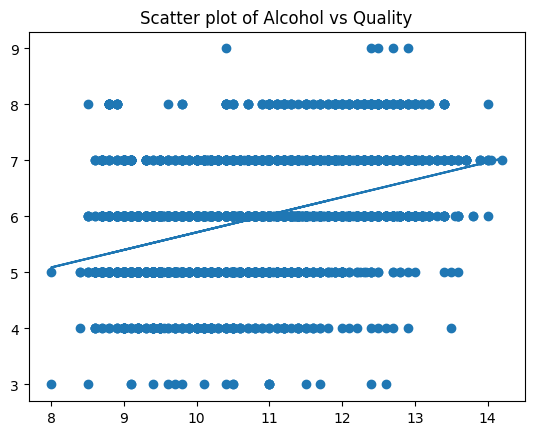

In [39]:
plt.scatter(X['alcohol'], y)
plt.title(f'Scatter plot of Alcohol vs Quality')
plt.plot(X['alcohol'], lr.coef_[0]*X['alcohol'] + lr.intercept_)



6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2

In [41]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [42]:
X_2 = X[['volatile_acidity', 'alcohol', 'density']]

model = LinearRegression()
model.fit(X_2, y)

y_pred = model.predict(X_2)

intercept = model.intercept_
coefficients = model.coef_
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Calculate RMSE directly
r2 = r2_score(y, y_pred)

print(f'Intercept: {intercept}')
print('Coefficients:')
for feature, coef in zip(X.columns, coefficients):
    print(f'  {feature}: {coef}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')

Intercept: -36.498611308344806
Coefficients:
  fixed_acidity: -2.0721159353648115
RMSE: 0.7684872688163132
R²: 0.24690635620080081
  volatile_acidity: 0.398892824449016
RMSE: 0.7684872688163132
R²: 0.24690635620080081
  citric_acid: 38.99188669514994
RMSE: 0.7684872688163132
R²: 0.24690635620080081
